In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def showImage(img):
    if img.ndim == 3:
        plt.imshow(img[:,:,::-1])
    else:
        plt.imshow(img,cmap='gray')

def showPairs(img1,img2):
    fig,ax = plt.subplots(1,2)
    ax[0].imshow(img1[:,:,::-1])
    ax[1].imshow(img2[:,:,::-1])
raw, target = cv.imread('../datasets/landsat/raw.jpeg'), cv.imread('../datasets/landsat/target.jpeg')
raw.shape, target.shape
height,width,channels = raw.shape
showImage(raw)

[ WARN:0@15.133] global loadsave.cpp:248 findDecoder imread_('../datasets/landsat/raw.jpeg'): can't open/read file: check file path/integrity
[ WARN:0@15.134] global loadsave.cpp:248 findDecoder imread_('../datasets/landsat/target.jpeg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [90]:
imgray = cv.cvtColor(raw, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 10, 255, 0)

height_tip = 0
for i in range(height-1,-1,-1):
    if (sum(thresh[i,0]) > 0):
        height_tip = i
        break
width_tip = 0
for i in range(width-1,-1,-1):
    if (sum(thresh[height-1,i]) > 0):
        width_tip = i
        break

t_height = height - height_tip
t_width = width-width_tip
angle = np.arctan(t_width/t_height)
angle = np.rad2deg(angle)

            

In [190]:
def get_min_area_rect(image):
    imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(imgray, 10, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    maxContour = max(contours, key = cv.contourArea)
    rect = cv.minAreaRect(maxContour)
    return rect

def rotate_image(image, rotation_matrix=None):
    if rotation_matrix is None:
        rect = get_min_area_rect(image)
        center, size, angle = rect
        rotation_matrix = cv.getRotationMatrix2D(size, angle, 1)
    rotated_image = cv.warpAffine(image, rotation_matrix, (width,height), flags=cv.INTER_LINEAR)
    return rotated_image, rotation_matrix 

def crop_image(image, pt=None):
    if pt is None:
        rect = get_min_area_rect(image)
        center, size, angle = rect
        rect_width, rect_height = size
        bounding_box = cv.boxPoints(rect)
        bounding_box = np.int0(bounding_box)
        src_pts = bounding_box.astype("float32")
        dst_pts = np.array([[0, height - 1],
                            [0, 0],
                            [width - 1, 0],
                            [width - 1, height - 1]], dtype="float32")
        pt = cv.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv.warpPerspective(image, pt, (image.shape[1], image.shape[0]))
    return warped, pt

def bind_images(raw, target):
    raw, rotation_matrix = rotate_image(raw)
    target, _ = rotate_image(target, rotation_matrix)
    target, pt = crop_image(target)
    raw, _ = crop_image(raw, pt)
    return raw, target


/var/folders/c_/khc8nrj950scffqkmww1gv000000gn/T/ipykernel_13603/174988973.py:23: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  bounding_box = np.int0(bounding_box)


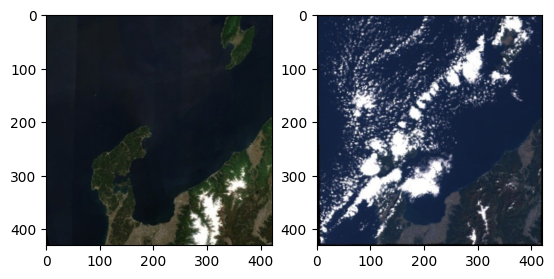

In [193]:
o1,o2 = bind_images(raw, target)
showPairs(o1,o2)

In [185]:
def crop_image

target_rect = get_min_area_rect(rotated_target)
# crop the image
rect_width, rect_height = target_rect[1]
bounding_box = cv.boxPoints(target_rect)
bounding_box = np.int0(bounding_box)
src_pts = bounding_box.astype("float32")
dst_pts = np.array([[0, height - 1],
                    [0, 0],
                    [width - 1, 0],
                    [width - 1, height - 1]], dtype="float32")

# Calculate the perspective transform matrix and warp
M = cv.getPerspectiveTransform(src_pts, dst_pts)
rotated_target_cropped = cv.warpPerspective(rotated_target, M, (width, height))
rotated_raw_cropped = cv.warpPerspective(rotated_raw, M, (width, height))


/var/folders/c_/khc8nrj950scffqkmww1gv000000gn/T/ipykernel_13603/3171318186.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  bounding_box = np.int0(bounding_box)


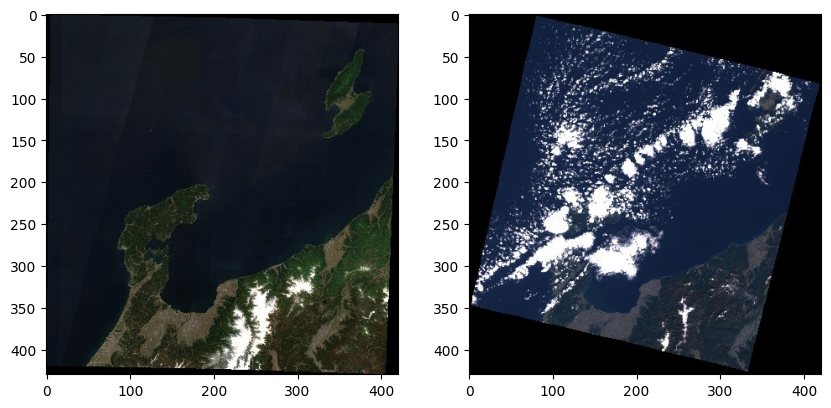

In [187]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(raw[:,:,::-1])
ax[1].imshow(target[:,:,::-1])

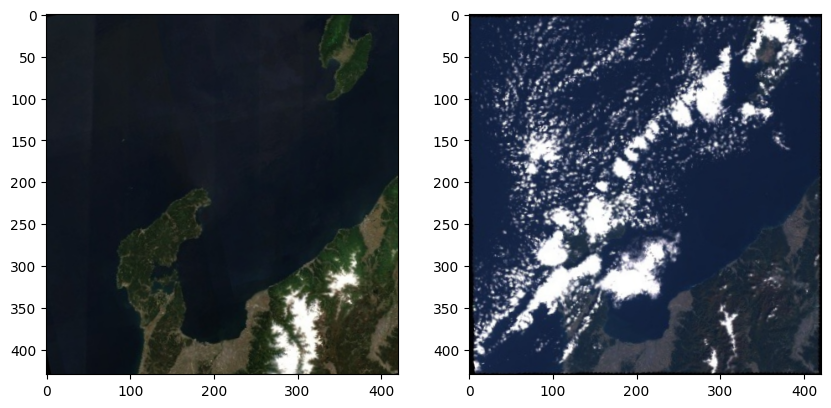

In [186]:
rotated_target = cv.warpAffine(target, rotation_matrix, (width,height))
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(rotated_raw_cropped[:,:,::-1])
ax[1].imshow(rotated_target_cropped[:,:,::-1])

In [12]:
import os
import cv2 as cv
src_dir = "../datasets/landsat_4/val"
i = 0
for path, dirs, files in os.walk(src_dir):
    for file in files:
        if file.endswith(".jpg"):
            raw = cv.imread(os.path.join(path,file))
            width = raw.shape[1]
            img1 = raw[:,:width//2]
            img2 = raw[:,width//2:]
            cv.imwrite("../" + file, img1)
            # cv.imwrite("../" + file, img2)
        i += 1
        if i > 10:
            break
    if i > 10:
        break